# Importing libraries

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import librosa
import librosa.display
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15})

In [230]:
y,sr = librosa.load('../Data/genres_original/reggae/reggae.00036.wav')

In [231]:
print('y:',y,'\n') 
print('y shape:',y.shape,'\n')
print('Length of y:',len(y),'\n')
print('Type: ',type(y),'\n')

y: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

y shape: (661794,) 

Length of y: 661794 

Type:  <class 'numpy.ndarray'> 



In [232]:
print('Sample Rate (KHz) :',sr,'\n')
print('Length of Audio File: ',y.shape[0]/sr,'seconds','\n')

Sample Rate (KHz) : 22050 

Length of Audio File:  30.013333333333332 seconds 



In [233]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file,_ = librosa.effects.trim(y)

In [234]:
print('Audio File',audio_file,'\n')
print('Ret',_,'\n')
print('Shape of audio file: ',audio_file.shape,'\n')

Audio File [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

Ret [     0 661794] 

Shape of audio file:  (661794,) 



# Plotting of Sound Wave 

Text(0.5, 1.0, 'Sound Waves in Reggae 36')

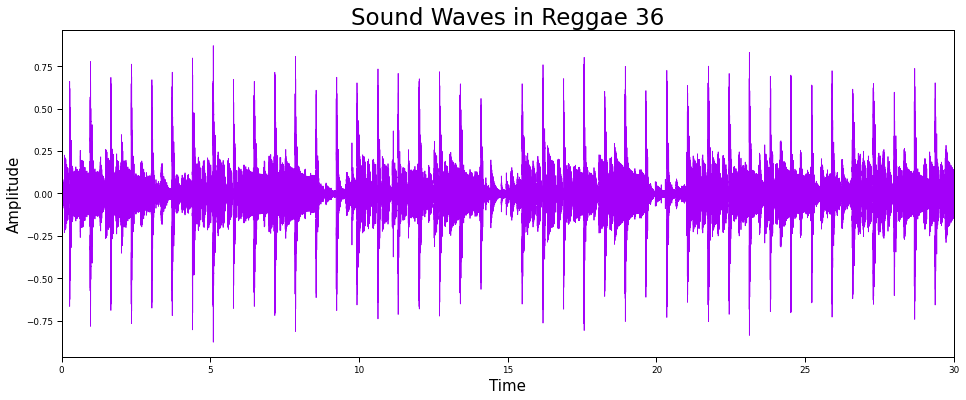

In [235]:
plt.figure(figsize=(16,6))
librosa.display.waveplot(y=audio_file,sr=sr,color = "#A300F9")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound Waves in Reggae 36',fontsize=23)

# Power Spectrum

In [236]:
#Taking the fft to chnage from time to frequency domain
fft_reggae36 = np.fft.fft(audio_file)
magnitude = np.abs(fft_reggae36)
freuqeuncy_reggae36 = np.linspace(0,sr,len(magnitude))

In [237]:
print(f'{fft_reggae36}\n\n length = {len(fft_reggae36)}')

[-13.90493774-1.75415238e-14j  -3.66881741+1.03619736e-01j
  -3.69122576+4.40757631e-02j ...  -3.70872882-4.53336627e-02j
  -3.69122576-4.40757631e-02j  -3.66881741-1.03619736e-01j]

 length = 661794


In [238]:
print(f'{magnitude}\n\n length = {len(magnitude)}')

[13.90493774  3.6702804   3.6914889  ...  3.70900588  3.6914889
  3.6702804 ]

 length = 661794


In [239]:
print(f'{freuqeuncy_reggae36}')

[0.00000000e+00 3.33185754e-02 6.66371509e-02 ... 2.20499334e+04
 2.20499667e+04 2.20500000e+04]


Text(0.5, 1.0, 'Power Spectrum in Reggae')

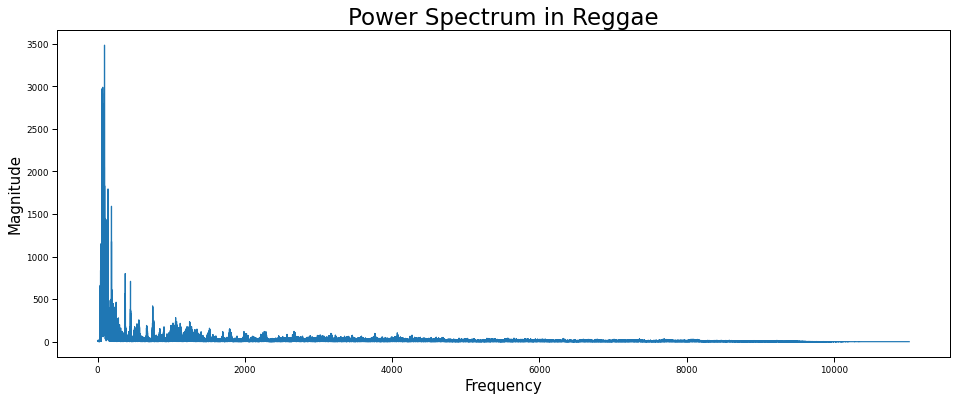

In [240]:
plt.figure(figsize=(16,6))
plt.plot(freuqeuncy_reggae36[:int(len(freuqeuncy_reggae36)/2)],magnitude[:int(len(magnitude)/2)])
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Power Spectrum in Reggae',fontsize=23)

# Spectrogram

In [241]:
# Short-time Fourier transform (STFT)
n_fft = 2048
hop_length = 512
spectrogram = np.abs(librosa.stft(y=audio_file,n_fft=n_fft,hop_length=hop_length)) 

Text(0.5, 1.0, 'Amplitude To DB')

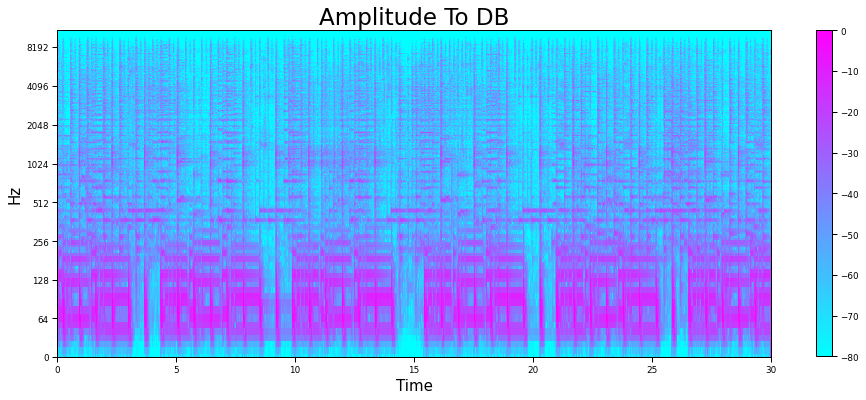

In [245]:
DB = librosa.amplitude_to_db(spectrogram)
plt.figure(figsize=(16,6))
librosa.display.specshow(DB,x_axis='time',y_axis='log',cmap='cool',sr=sr,hop_length=hop_length)
plt.colorbar()
plt.title('Amplitude To DB',fontsize = 23)

# Mel Spectrogram

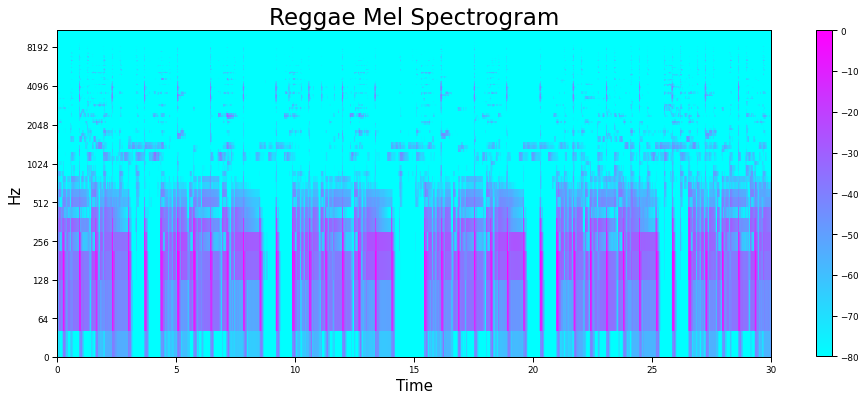

In [246]:
#The Mel Spectrogram is a normal Spectrogram, but with a Mel Scale on the y axis.
#The mel scale (after the word melody) is a perceptual scale of pitches judged by listeners to be equal 
#in distance from one another. Humans perceive frequency logarithmically
mel_spectrogram = librosa.feature.melspectrogram(audio_file, sr=sr)
mel_spectrogram_DB = librosa.amplitude_to_db(mel_spectrogram)
plt.figure(figsize = (16, 6))
librosa.display.specshow(mel_spectrogram_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',cmap = 'cool');
plt.colorbar()
plt.title("Reggae Mel Spectrogram", fontsize = 23);

# Zero Crossings

In [244]:
#Zero-crossing rate is a measure of number of times in a given time interval/frame that the amplitude of the speech 
#signals passes through a value of zero.A large number of zero crossings implies that there is no dominant 
#low-frequency oscillation.
zero_crossings = librosa.zero_crossings(audio_file,pad=False)
print('Reggae Zero Crossings',sum(zero_crossings),'\n')

Reggae Zero Crossings 39232 



# Harmonics And Percussive Sounds

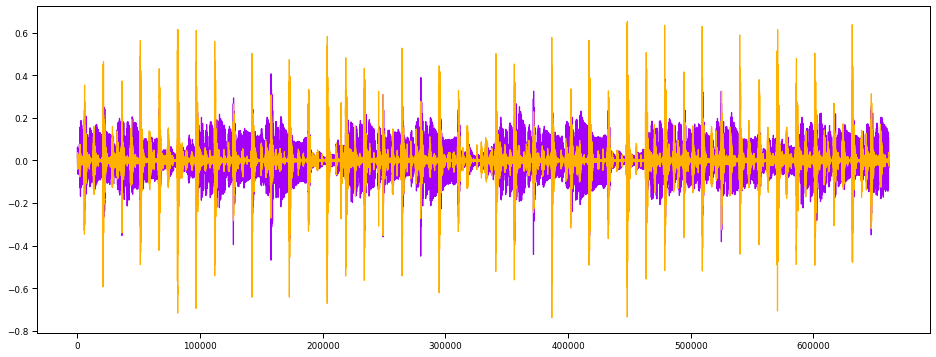

In [136]:
#Harmonic sound on the one hand side is what we perceive as pitched sound and what makes us hear melodies and chords. 
#Percussive sound on the other hand is noise-like and usually stems from instrument onsets like the hit on a drum or 
#from consonants in speech.
y_harm,y_per = librosa.effects.hpss(audio_file)
plt.figure(figsize=(16,6))
plt.plot(y_harm,color='#A300F9')
plt.plot(y_per,color='#FFB100')

# Chromagram

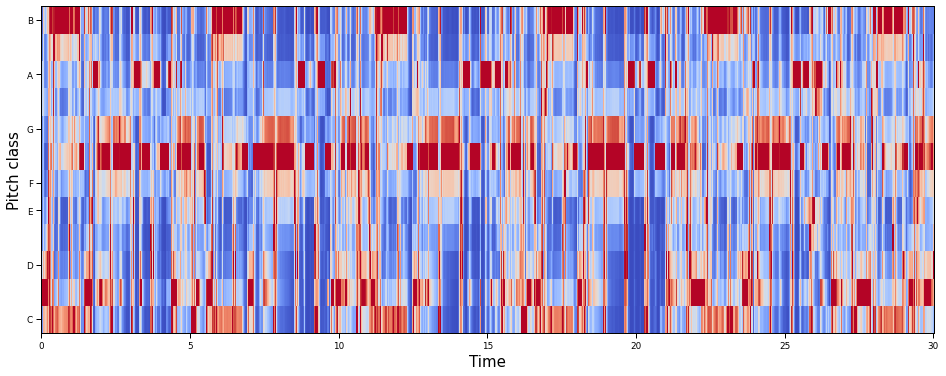

In [137]:
#In music, the term chroma feature or chromagram closely relates to the twelve different pitch classes.
#Powerful tool for analyzing music whose pitches can be meaningfully categorized.
#There are 12 different notes that we can play in music. A, B, C, D, E, F, G (7 of the 12 notes) 
#which are played on the white keys of the piano in addition to 5 other notes played on the black keys.
chromagram = librosa.feature.chroma_stft(audio_file, sr=sr, hop_length=hop_length)
plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

# Beat Tracker

In [138]:
# beat instants that might correspond to when a human listener would tap his foot
tempo,_ = librosa.beat.beat_track(audio_file,sr=sr)
print(tempo)

86.1328125


In [139]:
y_metal,sr_metal = librosa.load('../Data/genres_original/metal/metal.00036.wav')
y_metal,_ = librosa.effects.trim(y_metal)

Text(0.5, 1.0, 'Sound Waves in Metal 36')

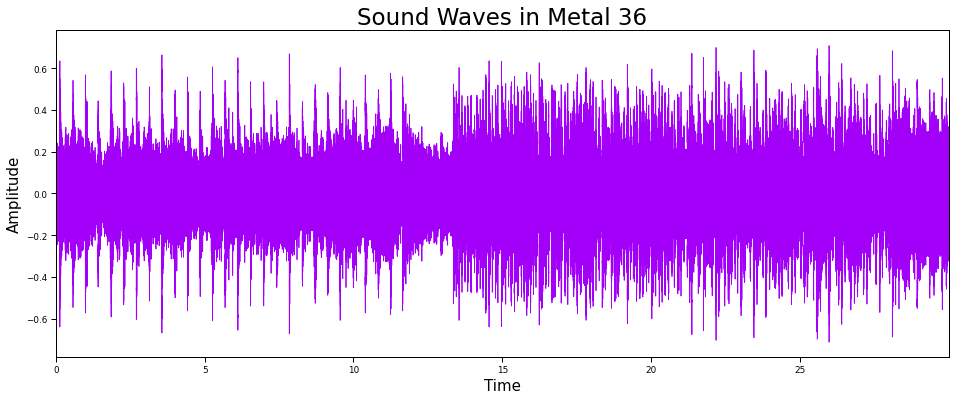

In [140]:
plt.figure(figsize=(16,6))
librosa.display.waveplot(y=y_metal,sr=sr,color = "#A300F9")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound Waves in Metal 36',fontsize=23)

In [141]:
fft_metal36 = np.fft.fft(y_metal)
magnitude = np.abs(fft_metal36)
freuqeuncy_metal36 = np.linspace(0,sr,len(magnitude))

Text(0.5, 1.0, 'Power Spectrum in Metal')

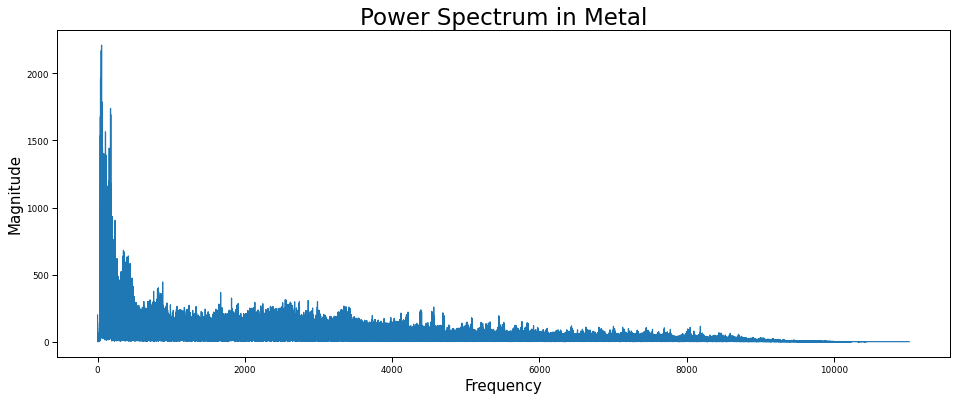

In [142]:
plt.figure(figsize=(16,6))
plt.plot(freuqeuncy_metal36[:int(len(freuqeuncy_metal36)/2)],magnitude[:int(len(magnitude)/2)])
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Power Spectrum in Metal',fontsize=23)

In [143]:
spectrogram = np.abs(librosa.stft(y=y_metal,n_fft=n_fft,hop_length=hop_length)) 

Text(0.5, 1.0, 'Amplitude To DB')

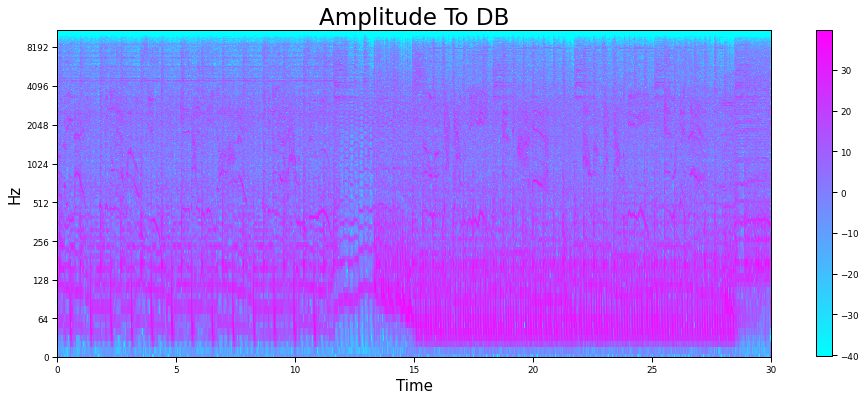

In [145]:
DB = librosa.amplitude_to_db(spectrogram)
plt.figure(figsize=(16,6))
librosa.display.specshow(DB,x_axis='time',y_axis='log',cmap='cool',sr=sr,hop_length=hop_length)
plt.colorbar()
plt.title('Amplitude To DB',fontsize = 23)

Text(0.5, 1.0, 'Metal Mel Spectrogram')

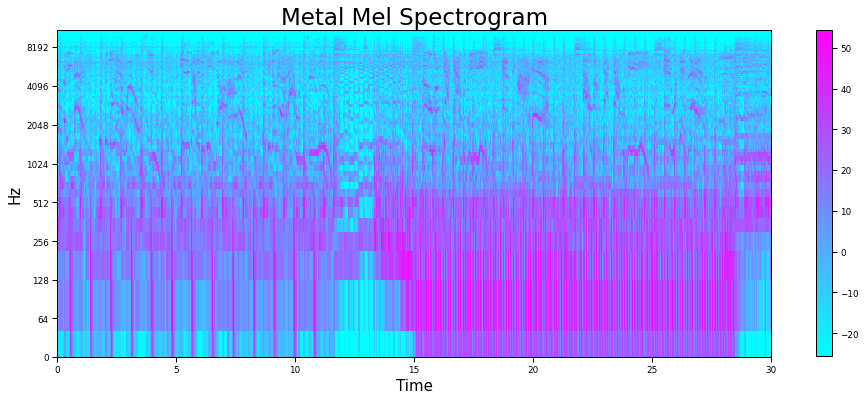

In [146]:
S_metal = librosa.feature.melspectrogram(y=y_metal,sr=sr_metal)
S_metalDB = librosa.amplitude_to_db(S_metal)
plt.figure(figsize=(16,6))
librosa.display.specshow(S_metalDB,hop_length=hop_length,sr=sr_metal,cmap='cool',x_axis='time',y_axis='log')
plt.colorbar()
plt.title('Metal Mel Spectrogram',fontsize=23)

In [147]:
zero_crossings_metal = librosa.zero_crossings(y_metal,pad=False)
print('Metal Zero Crossings',sum(zero_crossings_metal),'\n')

Metal Zero Crossings 106295 



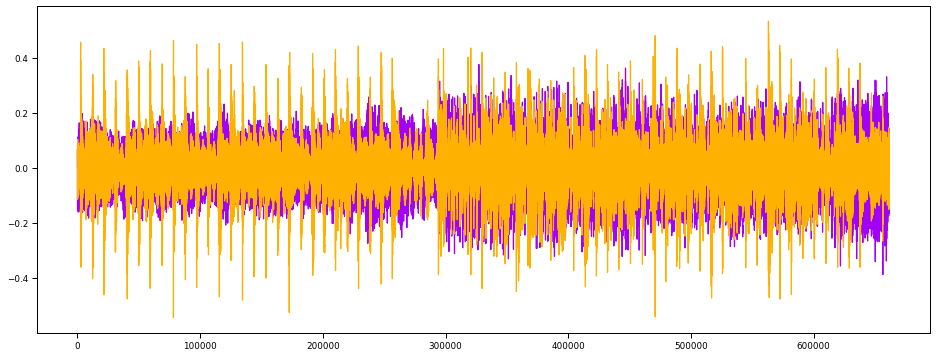

In [148]:
y_harm_metal,y_per_metal = librosa.effects.hpss(y_metal)
plt.figure(figsize=(16,6))
plt.plot(y_harm_metal,color='#A300F9')
plt.plot(y_per_metal,color='#FFB100')

In [149]:
tempo_metal,_ = librosa.beat.beat_track(y_metal,sr=sr_metal)
print(tempo_metal)

143.5546875


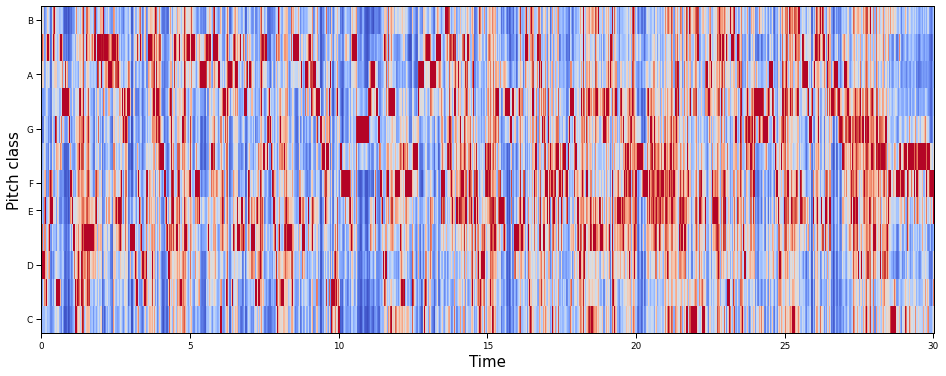

In [150]:
chromagram = librosa.feature.chroma_stft(y_metal, sr=sr, hop_length=hop_length)
plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

# Classification

In [151]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [152]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

In [153]:
dataset = pd.read_csv('../Data/features_3_sec.csv')
dataset.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [154]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [155]:
dataset['label'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [156]:
dataset['label'].nunique()

10

In [157]:
dataset.isnull().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [158]:
num_cols = dataset._get_numeric_data().columns
print(num_cols)
print('----------------------------*****************************************-------------------------------')
print('Total',len(num_cols))

Index(['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var'],
      dtype='

In [159]:
print(set(dataset.columns)-set(num_cols))

{'label', 'filename'}


In [160]:
dataset_filtered = dataset.iloc[:,1:]
dataset_filtered.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [161]:
dataset_filtered['label'].value_counts()

reggae       1000
metal        1000
blues        1000
pop          1000
jazz         1000
disco         999
hiphop        998
rock          998
classical     998
country       997
Name: label, dtype: int64

In [162]:
temp_list = dataset_filtered['label'].value_counts()
count_list = []
for i in range(len(temp_list)):
    count_list.append(temp_list[i])

Text(0.5, 1.0, 'Labels And Their Counts')

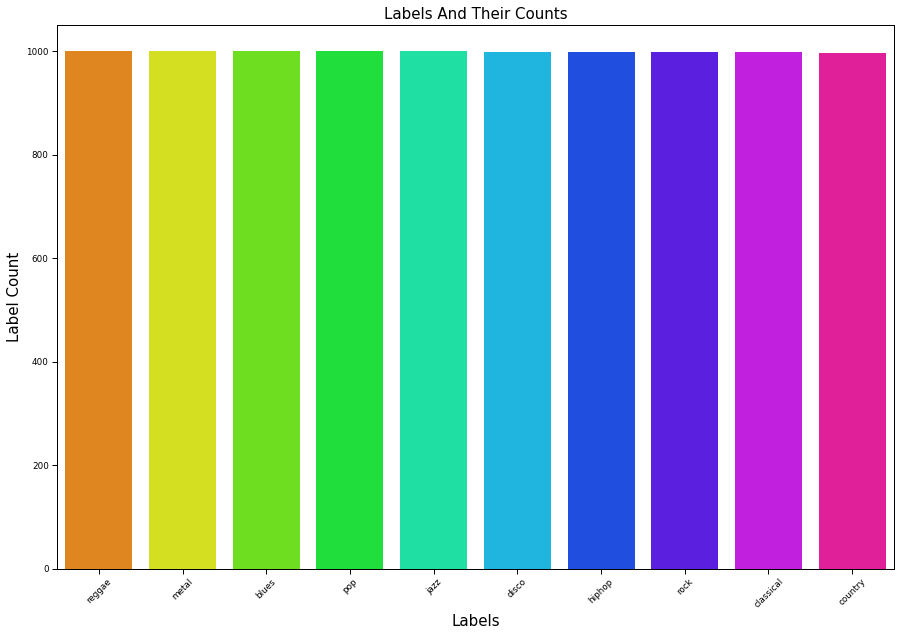

In [163]:
plt.figure(figsize=(15,10))
sns.barplot(x=pd.Series(dataset_filtered['label'].value_counts()).index, y=pd.Series(count_list), palette ='hsv')
plt.xticks(rotation= 45)
plt.xlabel('Labels')
plt.ylabel('Label Count')
plt.title('Labels And Their Counts')

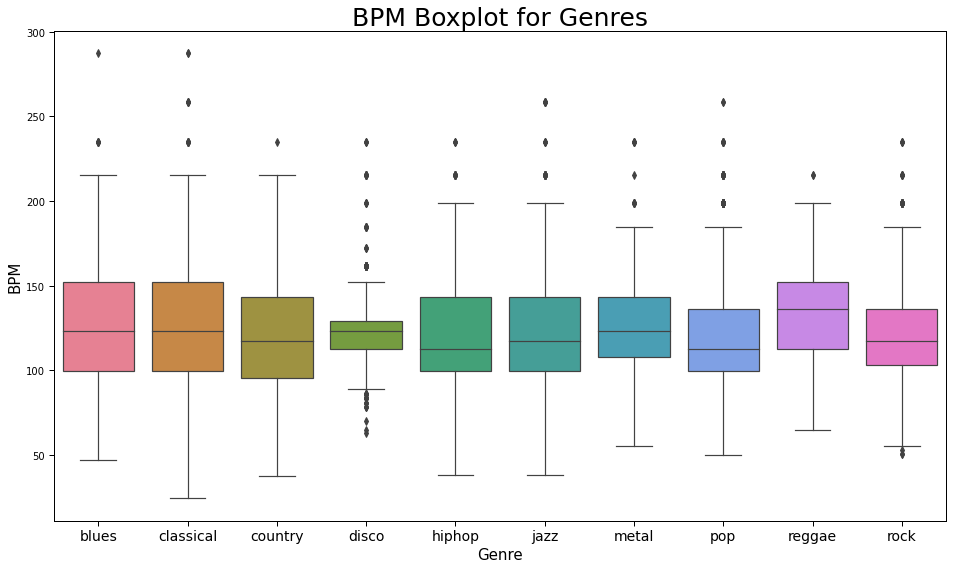

In [164]:
x = dataset_filtered[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10)
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)

Text(0, 0.5, 'BPM')

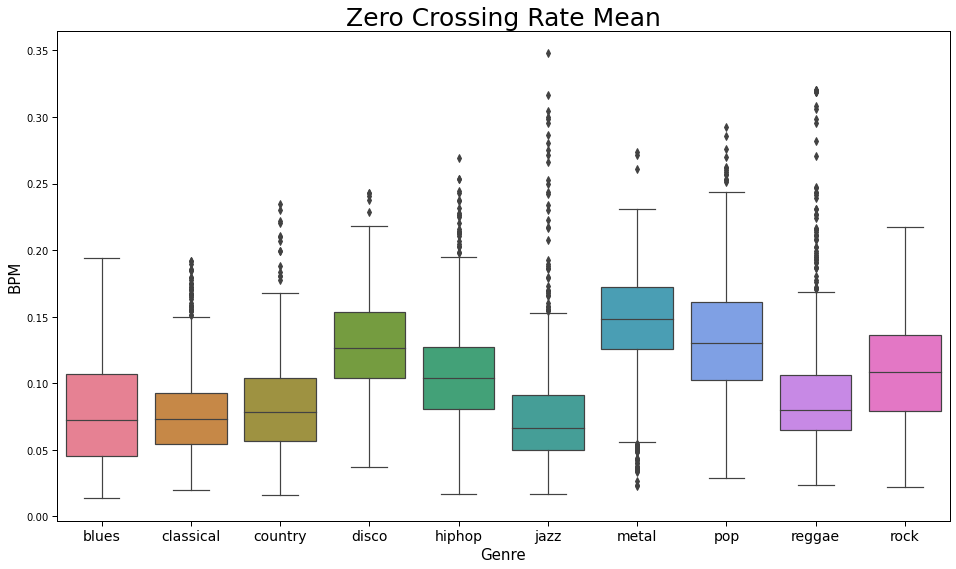

In [250]:
x = dataset_filtered[["label", "zero_crossing_rate_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "zero_crossing_rate_mean", data = x, palette = 'husl');

plt.title('Zero Crossing Rate Mean', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10)
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)

# Plotting Heatmap

<AxesSubplot:>

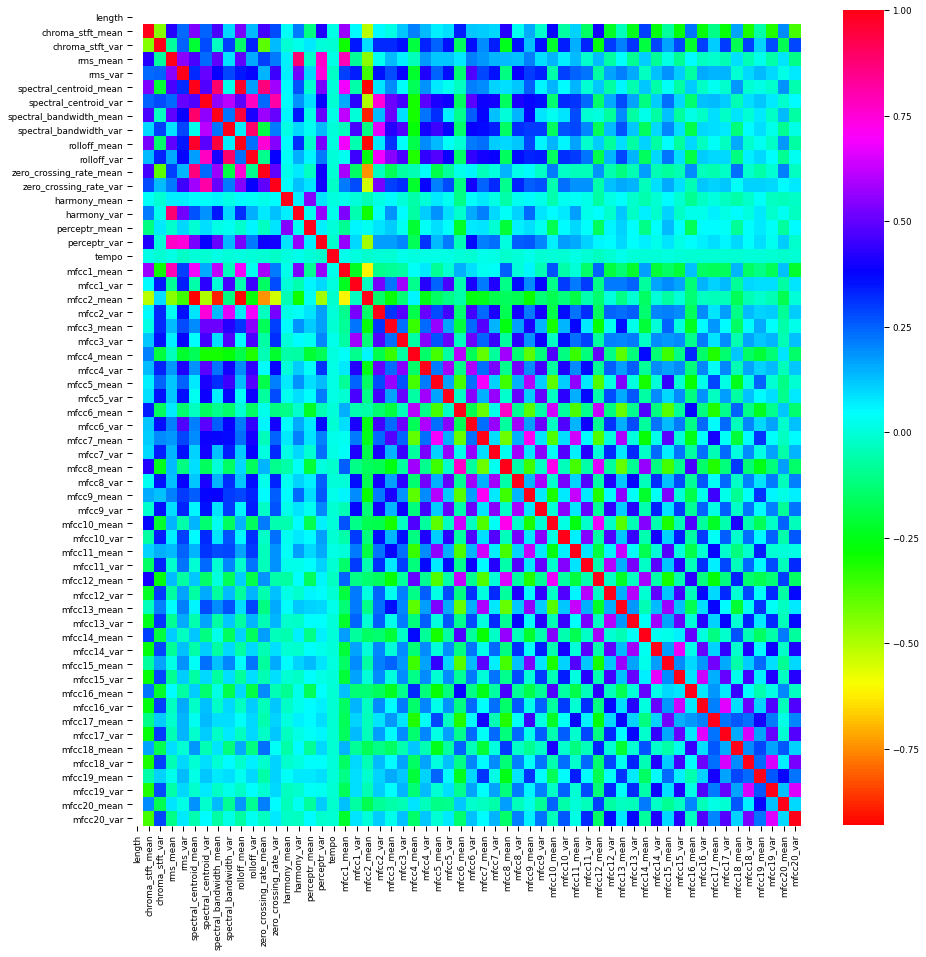

In [165]:
plt.figure(figsize=(15,15))
sns.heatmap(data=dataset_filtered.corr(),cmap='hsv')

# Finding Most Correlated Features For MultiCollinearity

In [166]:
# Multicollinearity exists whenever an independent variable is highly correlated with one or more of the other 
# independent variables in a multiple regression equation.Multicollinearity is a problem because it undermines 
# the statistical significance of an independent variable.
c = dataset_filtered.corr()
s = c.unstack()
s = s.dropna()
so = s.sort_values(kind='quicksort')

In [167]:
top_corr = []
top_corr_index = []
for i in range(len(so)):
    if so[i] > 0.95 and so[i] < 1.0:
        top_corr.append(so[i])
        top_corr_index.append(i)
print(top_corr)
print("*----------------------------------------------------------------------------------------------*")
print(top_corr_index)

[0.9510001983017642, 0.9510001983017642, 0.9743599625424502, 0.9743599625424502]
*----------------------------------------------------------------------------------------------*
[3188, 3189, 3190, 3191]


In [168]:
print(f'Most Correlated - \n{so[3188:3192]}')

Most Correlated - 
spectral_bandwidth_mean  rolloff_mean               0.95100
rolloff_mean             spectral_bandwidth_mean    0.95100
                         spectral_centroid_mean     0.97436
spectral_centroid_mean   rolloff_mean               0.97436
dtype: float64


# Data Preparation

In [169]:
dataset_filtered.drop('rolloff_mean',axis = 1,inplace = True)
dataset_filtered.drop('spectral_bandwidth_mean',axis = 1,inplace = True)
dataset_filtered.drop('spectral_centroid_mean',axis = 1,inplace = True)

In [170]:
y = dataset_filtered['label'].values
X = dataset_filtered.drop('label',axis=1).values

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [172]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building

In [173]:
def model_assess(model, title = "Default"):
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [174]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
# implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss 
# is estimated each sample at a time
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
#The number of trees in the forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
# one-vs-one (‘ovo’) is always used as multi-class strategy
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
#For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")


Accuracy Naive Bayes : 0.53153 

Accuracy Stochastic Gradient Descent : 0.65999 

Accuracy KNN : 0.7968 

Accuracy Decission trees : 0.64665 

Accuracy Random Forest : 0.81715 

Accuracy Support Vector Machine : 0.85152 

Accuracy Logistic Regression : 0.71271 



# Building Neural Network

In [175]:
import tensorflow as tf

In [176]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [177]:
ann = tf.keras.models.Sequential()

In [178]:
ann.add(tf.keras.layers.Dense(units=1024, activation='relu'))
ann.add(Dropout(0.2))

ann.add(tf.keras.layers.Dense(units=512, activation='relu'))
ann.add(Dropout(0.2))

ann.add(tf.keras.layers.Dense(units=256, activation='relu'))
ann.add(Dropout(0.2))

ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(Dropout(0.2))

ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(Dropout(0.2))

ann.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [179]:
ann.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm 
# that can handle sparse gradients on noisy problems.

In [180]:
X_train_scaled.shape

(6993, 55)

In [182]:
y_train

array(['disco', 'reggae', 'hiphop', ..., 'reggae', 'classical',
       'classical'], dtype=object)

In [183]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [184]:
y = labelencoder.fit_transform(y)
print(y)

[0 0 0 ... 9 9 9]


In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [186]:
history = ann.fit(X_train_scaled, y_train, batch_size = 32,validation_data=(X_test_scaled,y_test),epochs = 100)

Epoch 1/100
219/219 [==============================] - 3s 12ms/step - loss: 1.6998 - accuracy: 0.3721 - val_loss: 0.9491 - val_accuracy: 0.6800
Epoch 2/100
219/219 [==============================] - 2s 11ms/step - loss: 0.9687 - accuracy: 0.6810 - val_loss: 0.8272 - val_accuracy: 0.7197
Epoch 3/100
219/219 [==============================] - 2s 11ms/step - loss: 0.7686 - accuracy: 0.7529 - val_loss: 0.6428 - val_accuracy: 0.7891
Epoch 4/100
219/219 [==============================] - 3s 12ms/step - loss: 0.6107 - accuracy: 0.8007 - val_loss: 0.5997 - val_accuracy: 0.8155
Epoch 5/100
219/219 [==============================] - 3s 12ms/step - loss: 0.5233 - accuracy: 0.8286 - val_loss: 0.5125 - val_accuracy: 0.8382
Epoch 6/100
219/219 [==============================] - 3s 13ms/step - loss: 0.4441 - accuracy: 0.8555 - val_loss: 0.4980 - val_accuracy: 0.8388
Epoch 7/100
219/219 [==============================] - 3s 12ms/step - loss: 0.3866 - accuracy: 0.8719 - val_loss: 0.4581 - val_accuracy:

219/219 [==============================] - 3s 12ms/step - loss: 0.0540 - accuracy: 0.9870 - val_loss: 0.4140 - val_accuracy: 0.9082
Epoch 58/100
219/219 [==============================] - 3s 12ms/step - loss: 0.0484 - accuracy: 0.9858 - val_loss: 0.4153 - val_accuracy: 0.9169
Epoch 59/100
219/219 [==============================] - 3s 12ms/step - loss: 0.0570 - accuracy: 0.9842 - val_loss: 0.4550 - val_accuracy: 0.9066
Epoch 60/100
219/219 [==============================] - 3s 12ms/step - loss: 0.0608 - accuracy: 0.9852 - val_loss: 0.3888 - val_accuracy: 0.9246
Epoch 61/100
219/219 [==============================] - 3s 13ms/step - loss: 0.0424 - accuracy: 0.9864 - val_loss: 0.4750 - val_accuracy: 0.9076
Epoch 62/100
219/219 [==============================] - 3s 12ms/step - loss: 0.0655 - accuracy: 0.9827 - val_loss: 0.4502 - val_accuracy: 0.9142
Epoch 63/100
219/219 [==============================] - 3s 12ms/step - loss: 0.0524 - accuracy: 0.9855 - val_loss: 0.3863 - val_accuracy: 0.920

In [187]:
train_loss, train_acc = ann.evaluate(X_train_scaled, y_train, batch_size=32)
test_loss, test_acc  = ann.evaluate(X_test_scaled, y_test, batch_size=32)

94/94 [==============================] - 0s 4ms/step - loss: 0.5040 - accuracy: 0.9239


In [188]:
print('Train Loss = ',train_loss,'\nTrain Accuracy = ',train_acc * 100)
print('******************************')
print('Test Loss = ',test_loss,'\nTest Accuracy = ',test_acc * 100)

Train Loss =  0.004800183232873678 
Train Accuracy =  99.85700249671936
******************************
Test Loss =  0.5039509534835815 
Test Accuracy =  92.3923909664154


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


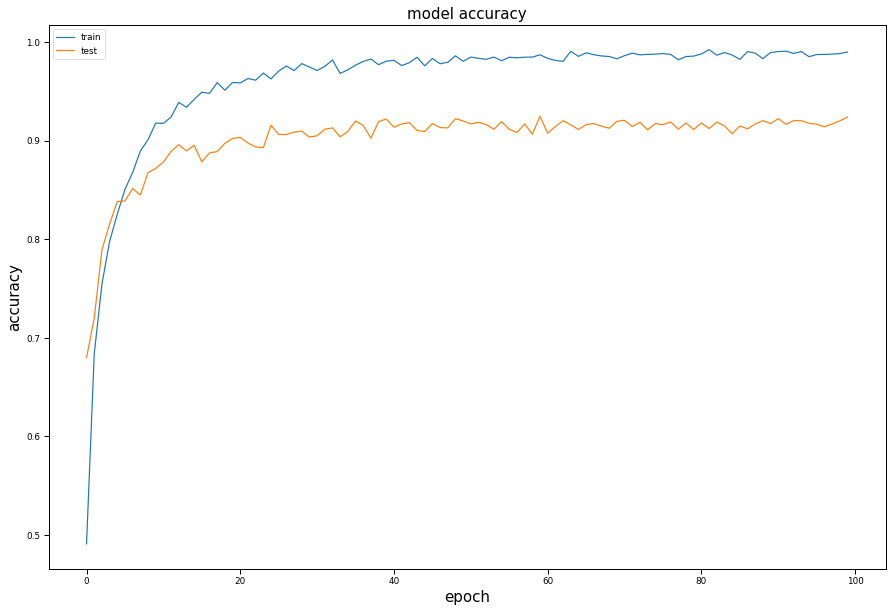

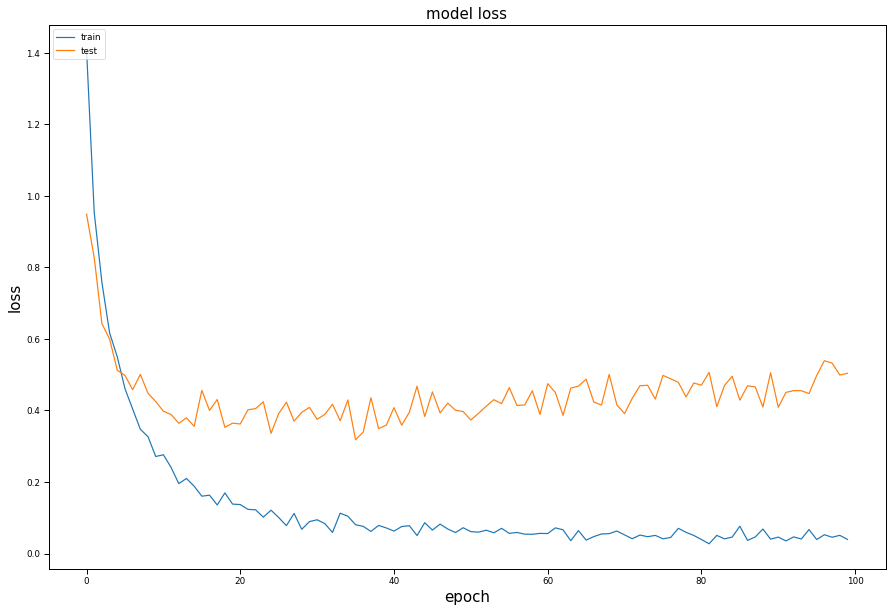

In [189]:
# list all data in history
plt.figure(figsize=(15,10))
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Comparison Of Accuracy 

<AxesSubplot:xlabel='Accuracy', ylabel='Algorithms'>

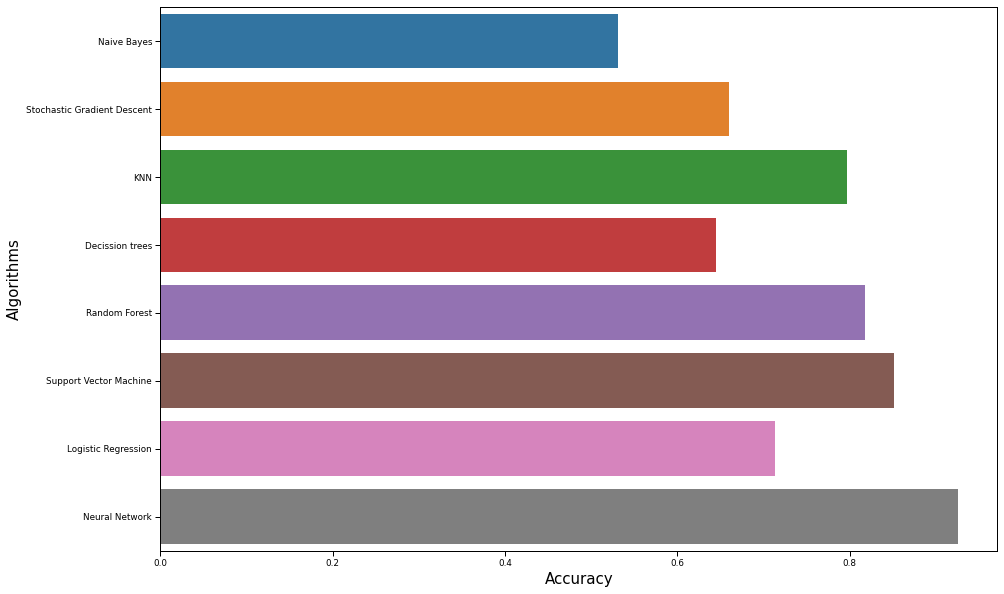

In [254]:
algos = ['Naive Bayes','Stochastic Gradient Descent','KNN','Decission trees','Random Forest','Support Vector Machine','Logistic Regression','Neural Network']
values = [0.53153,0.65999,0.7968,0.64464, 0.81715,0.85152,0.71271,0.9239]
data={'Algorithms':algos,'Accuracy':values}
res = pd.DataFrame(data=data)
plt.figure(figsize=(15,10))
sns.barplot(data = res,x=res['Accuracy'],y=res['Algorithms'])

# Recommendation System

In [191]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing
data = pd.read_csv('../Data/features_3_sec.csv', index_col='filename')
labels = data[['label']]
data = data.drop(columns=['length','label'])
data.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
filename,,,,,,,,,,,,,,,,,,,,,
blues.00000.0.wav,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
blues.00000.1.wav,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
blues.00000.2.wav,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
blues.00000.3.wav,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
blues.00000.4.wav,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694


In [192]:
data_scaled=preprocessing.scale(data)
similarity = cosine_similarity(data_scaled)
sim_df_labels = pd.DataFrame(similarity)
sim_df_labels.head()

,0,1,2,3,4,5,6,7,8,9,...,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989
0,1.000000,0.566223,0.574240,0.762002,0.761645,0.650941,0.695498,0.766532,0.760135,0.627689,...,0.221833,0.154208,-0.013789,0.372188,0.456640,0.387531,0.382302,0.048050,0.457812,0.353021
1,0.566223,1.000000,0.639639,0.749346,0.615946,0.605654,0.692011,0.641135,0.786465,0.765471,...,0.412396,0.519078,-0.069361,0.570347,0.617002,0.634812,0.509724,-0.040774,0.553467,0.329800
2,0.574240,0.639639,1.000000,0.659545,0.715466,0.595426,0.750551,0.733546,0.525333,0.580205,...,0.290419,0.320014,0.056435,0.469341,0.306737,0.432974,0.198399,0.037191,0.530360,0.192676
3,0.762002,0.749346,0.659545,1.000000,0.796544,0.787118,0.772266,0.810613,0.729950,0.617242,...,0.257953,0.348760,-0.088100,0.524289,0.524339,0.515108,0.395785,-0.035468,0.542242,0.327122
4,0.761645,0.615946,0.715466,0.796544,1.000000,0.749515,0.806425,0.843051,0.619045,0.618250,...,0.339456,0.362799,-0.159643,0.502492,0.489419,0.527737,0.423894,-0.091949,0.589148,0.380534


In [193]:
labels

,label
filename,
blues.00000.0.wav,blues
blues.00000.1.wav,blues
blues.00000.2.wav,blues
blues.00000.3.wav,blues
blues.00000.4.wav,blues
...,...
rock.00099.5.wav,rock
rock.00099.6.wav,rock
rock.00099.7.wav,rock


In [194]:
sim_df_names = sim_df_labels.set_index(labels.index)
sim_df_names.head()

,0,1,2,3,4,5,6,7,8,9,...,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989
filename,,,,,,,,,,,,,,,,,,,,,
blues.00000.0.wav,1.000000,0.566223,0.574240,0.762002,0.761645,0.650941,0.695498,0.766532,0.760135,0.627689,...,0.221833,0.154208,-0.013789,0.372188,0.456640,0.387531,0.382302,0.048050,0.457812,0.353021
blues.00000.1.wav,0.566223,1.000000,0.639639,0.749346,0.615946,0.605654,0.692011,0.641135,0.786465,0.765471,...,0.412396,0.519078,-0.069361,0.570347,0.617002,0.634812,0.509724,-0.040774,0.553467,0.329800
blues.00000.2.wav,0.574240,0.639639,1.000000,0.659545,0.715466,0.595426,0.750551,0.733546,0.525333,0.580205,...,0.290419,0.320014,0.056435,0.469341,0.306737,0.432974,0.198399,0.037191,0.530360,0.192676
blues.00000.3.wav,0.762002,0.749346,0.659545,1.000000,0.796544,0.787118,0.772266,0.810613,0.729950,0.617242,...,0.257953,0.348760,-0.088100,0.524289,0.524339,0.515108,0.395785,-0.035468,0.542242,0.327122
blues.00000.4.wav,0.761645,0.615946,0.715466,0.796544,1.000000,0.749515,0.806425,0.843051,0.619045,0.618250,...,0.339456,0.362799,-0.159643,0.502492,0.489419,0.527737,0.423894,-0.091949,0.589148,0.380534


In [195]:
sim_df_names.columns = labels.index
sim_df_names.head()

filename,blues.00000.0.wav,blues.00000.1.wav,blues.00000.2.wav,blues.00000.3.wav,blues.00000.4.wav,blues.00000.5.wav,blues.00000.6.wav,blues.00000.7.wav,blues.00000.8.wav,blues.00000.9.wav,...,rock.00099.0.wav,rock.00099.1.wav,rock.00099.2.wav,rock.00099.3.wav,rock.00099.4.wav,rock.00099.5.wav,rock.00099.6.wav,rock.00099.7.wav,rock.00099.8.wav,rock.00099.9.wav
filename,,,,,,,,,,,,,,,,,,,,,
blues.00000.0.wav,1.000000,0.566223,0.574240,0.762002,0.761645,0.650941,0.695498,0.766532,0.760135,0.627689,...,0.221833,0.154208,-0.013789,0.372188,0.456640,0.387531,0.382302,0.048050,0.457812,0.353021
blues.00000.1.wav,0.566223,1.000000,0.639639,0.749346,0.615946,0.605654,0.692011,0.641135,0.786465,0.765471,...,0.412396,0.519078,-0.069361,0.570347,0.617002,0.634812,0.509724,-0.040774,0.553467,0.329800
blues.00000.2.wav,0.574240,0.639639,1.000000,0.659545,0.715466,0.595426,0.750551,0.733546,0.525333,0.580205,...,0.290419,0.320014,0.056435,0.469341,0.306737,0.432974,0.198399,0.037191,0.530360,0.192676
blues.00000.3.wav,0.762002,0.749346,0.659545,1.000000,0.796544,0.787118,0.772266,0.810613,0.729950,0.617242,...,0.257953,0.348760,-0.088100,0.524289,0.524339,0.515108,0.395785,-0.035468,0.542242,0.327122
blues.00000.4.wav,0.761645,0.615946,0.715466,0.796544,1.000000,0.749515,0.806425,0.843051,0.619045,0.618250,...,0.339456,0.362799,-0.159643,0.502492,0.489419,0.527737,0.423894,-0.091949,0.589148,0.380534


In [196]:
def find_similar_songs(name):
    series = sim_df_names[name].sort_values(ascending = False)
    series = series.drop(name)
    print("Similar songs to", name)
    print(series.head(5))

In [197]:
find_similar_songs('blues.00000.0.wav')

Similar songs to blues.00000.0.wav
filename
blues.00000.7.wav    0.766532
blues.00000.3.wav    0.762002
blues.00000.4.wav    0.761645
blues.00000.8.wav    0.760135
blues.00000.6.wav    0.695498
Name: blues.00000.0.wav, dtype: float64


# Developing The Analogy

In [198]:
def cos_sim(A,B):
    cos_sim=np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))
    return cos_sim

In [213]:
song1 = data[data.index == 'blues.00000.0.wav'].to_numpy().flatten()
song1_scaled=preprocessing.scale(song1)
song2 = data[data.index == 'blues.00000.7.wav'].to_numpy().flatten()
song2_scaled=preprocessing.scale(song2)

In [214]:
round(cos_sim(song1_scaled,song2_scaled),8)

0.99902441

In [215]:
cosine_similarity(song1_scaled.reshape(1,-1),song2_scaled.reshape(1,-1))

array([[0.99902441]])